In [1]:
# Importing packages

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
# opening data from csv file
df = pd.read_csv('data/amboss.csv', index_col=0)

## General overview of the data


In [3]:
display(
    df.head(5),
    df.describe(),
    df.info(),
    df.shape,
    #df.columns,
    df.isna().sum(), # number of null values per column


)

<class 'pandas.core.frame.DataFrame'>
Index: 13847 entries, am_202157 to am_195024
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   date_of_first_purchase           1016 non-null   object
 1   purchased_lifetime               13847 non-null  bool  
 2   chapters_read_first_5_days       13847 non-null  int64 
 3   searches_first_5_days            13847 non-null  int64 
 4   questions_answered_first_5_days  13847 non-null  int64 
 5   created_at                       13847 non-null  object
 6   market                           13847 non-null  object
 7   class                            10901 non-null  object
 8   md_do                            76 non-null     object
 9   university_id                    13847 non-null  int64 
 10  device_type                      11649 non-null  object
 11  marketing_source                 11313 non-null  object
dtypes: bool(1), int64(4), obj

,date_of_first_purchase,purchased_lifetime,chapters_read_first_5_days,searches_first_5_days,questions_answered_first_5_days,created_at,market,class,md_do,university_id,device_type,marketing_source
user_id,,,,,,,,,,,,
am_202157,2019-10-15,False,15,2,0,2019-10-15,RoW,5th year,NaN,2509,desktop,NaN
am_190945,NaN,False,15,0,283,2019-04-22,RoW,NaN,NaN,903,mobile,NaN
am_206476,NaN,False,0,0,0,2019-12-07,RoW,3rd year,NaN,1449,mobile,advertisement
am_189151,NaN,False,19,21,0,2019-03-31,RoW,2nd year,NaN,1452,desktop,NaN
am_201843,NaN,False,8,0,10,2019-10-11,RoW,5th year,NaN,861,mobile,university


,chapters_read_first_5_days,searches_first_5_days,questions_answered_first_5_days,university_id
count,13847.000000,13847.000000,13847.000000,13847.000000
mean,10.932404,4.642016,9.155990,1222.733950
std,34.625804,16.035023,49.663899,1004.687102
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,50.000000
50%,1.000000,0.000000,0.000000,1138.000000
75%,8.000000,2.000000,1.000000,2112.000000
max,1907.000000,399.000000,2147.000000,3272.000000


None

(13847, 12)

date_of_first_purchase             12831
purchased_lifetime                     0
chapters_read_first_5_days             0
searches_first_5_days                  0
questions_answered_first_5_days        0
created_at                             0
market                                 0
class                               2946
md_do                              13771
university_id                          0
device_type                         2198
marketing_source                    2534
dtype: int64

In [13]:
# value counts for market
df['market'].value_counts()

market
RoW    13749
US        98
Name: count, dtype: int64

## Data cleaning and transformation

In [4]:
sources = df['marketing_source'].unique().tolist()

for source in sources:
    print(source)
    #print(source, df[df['marketing_source'] == source].shape[0])

nan
advertisement
university
focus_group
other_online_advertisement
other
friends
ambassador
facebook
google
press_online
students_work
app_store
amazon
instagram
conference
youtube
flyer
student_committee
library
guidelines
press


In [5]:
# purchased_lifetime	setting true to 0 and false to 1
#df['purchased_lifetime'] = df['purchased_lifetime'].replace({True: 1, False: 0})

# setting purchased_lifetime to categorical

# Setting 'date_of_first_purchase' and 'created_at' to datetime
df['date_of_first_purchase'] = pd.to_datetime(df['date_of_first_purchase'])
df['created_at'] = pd.to_datetime(df['created_at'])

# setting 'market' to 0 and 1
#df['market'] = df['market'].replace({'US': 1, 'RoW': 0})
df['market'] = df['market'].astype('category')

# replacing nan values in 'class' with '0'
df['class'] = df['class'].fillna('unknown')

# replacing other class values to numbers
#1st year', '2nd year', '3rd year', '4th year', '5th year', '6th year', 'unknown'
#df['class'] = df['class'].replace({'1st year': 1, '2nd year': 2, '3rd year': 3, '4th year': 4, '5th year': 5, '6th year': 6, 'unknown': 0})

# setting 'class' to int
df['class'] = df['class'].astype('category')

# replacing nan device_type values to 'unknown'
df['device_type'] = df['device_type'].fillna('unknown')

# replacing device_type values to numbers
#desktop', 'mobile', 'tablet', 'unknown
#df['device_type'] = df['device_type'].replace({'desktop': 1, 'mobile': 2, 'tablet': 3, 'unknown': 0})

# setting 'device_type' to int
df['device_type'] = df['device_type'].astype('category')

# replacing marketing source column nan values to 'unknown'
df['marketing_source'] = df['marketing_source'].fillna('unknown')

#replacing marketing source column values to numbers
# u
source_dict ={
    "unknown": 0,
    "advertisement": 1,
    "university": 2,
    "focus_group": 3,
    "other_online_advertisement": 4,
    "other": 5,
    "friends": 6,
    "ambassador": 7,
    "facebook": 8,
    "google": 9,
    "press_online": 10,
    "students_work": 11,
    "app_store": 12,
    "amazon": 13,
    "instagram": 14,
    "conference": 15,
    "youtube": 16,
    "flyer": 17,
    "student_committee": 18,
    "library": 19,
    "guidelines": 20,
    "press": 21
}

#df['marketing_source'] = df['marketing_source'].replace(source_dict)

# setting 'marketing_source' to in
df['marketing_source'] = df['marketing_source'].astype('category')

# dropping md_do column
# df = df.drop(columns=['md_do'])

# ranslating 'md_do' column to 1 and 2
#df['md_do'] = df['md_do'].replace({'MD': 1, 'DO': 2})

# replaning missing values with 0
#df['md_do'] = df['md_do'].fillna(0)


In [6]:
# M.D. or D.O. column shows the medical degree of the user. If filled, the user is a doctor. and NOT a student.
df['md_do'].unique()

# show all entries where md_do is not null
df[df['md_do'].notnull()]

,date_of_first_purchase,purchased_lifetime,chapters_read_first_5_days,searches_first_5_days,questions_answered_first_5_days,created_at,market,class,md_do,university_id,device_type,marketing_source
user_id,,,,,,,,,,,,
am_184765,NaT,False,0,0,4,2019-01-07,US,3rd year,M.D.,191,desktop,unknown
am_184675,NaT,False,3,0,22,2019-01-04,US,unknown,M.D.,2213,desktop,conference
am_184574,2019-05-29,False,0,0,0,2019-01-02,US,4th year,M.D.,2216,mobile,friends
am_184714,NaT,False,3,0,0,2019-01-05,US,4th year,D.O.,238,desktop,unknown
am_184741,NaT,False,0,0,177,2019-01-06,US,4th year,D.O.,230,mobile,friends
...,...,...,...,...,...,...,...,...,...,...,...,...
am_184729,NaT,False,22,8,60,2019-01-06,US,3rd year,M.D.,153,desktop,university
am_184619,NaT,False,2,0,18,2019-01-03,US,2nd year,M.D.,80,desktop,unknown
am_184725,NaT,False,0,0,0,2019-01-06,US,3rd year,M.D.,85,mobile,facebook


In [7]:
df.head(5)

,date_of_first_purchase,purchased_lifetime,chapters_read_first_5_days,searches_first_5_days,questions_answered_first_5_days,created_at,market,class,md_do,university_id,device_type,marketing_source
user_id,,,,,,,,,,,,
am_202157,2019-10-15,False,15,2,0,2019-10-15,RoW,5th year,NaN,2509,desktop,unknown
am_190945,NaT,False,15,0,283,2019-04-22,RoW,unknown,NaN,903,mobile,unknown
am_206476,NaT,False,0,0,0,2019-12-07,RoW,3rd year,NaN,1449,mobile,advertisement
am_189151,NaT,False,19,21,0,2019-03-31,RoW,2nd year,NaN,1452,desktop,unknown
am_201843,NaT,False,8,0,10,2019-10-11,RoW,5th year,NaN,861,mobile,university


In [8]:
# create a target column named '30-day-converted' and set it to 0
df['30-day-converted'] = 0



# setting 30-day-converted to 1 if user has purchased within 30 days after registration
# calculating the difference between date_of_first_purchase and created_at
df['difference'] = df['date_of_first_purchase'] - df['created_at']
# setting 30-day-converted to 1 if difference is less than 30 days
df.loc[df['difference'] < '30 days', '30-day-converted'] = 1
# setting 30-day-converted to 2 if difference is more than 30 days
df.loc[df['difference'] > '30 days', '30-day-converted'] = 2

# setting 30-day-converted to categorical
df['30-day-converted'] = df['30-day-converted'].astype('category')

# dropping difference column
#df = df.drop(columns=['difference'])

In [9]:
df.head(15)

,date_of_first_purchase,purchased_lifetime,chapters_read_first_5_days,searches_first_5_days,questions_answered_first_5_days,created_at,market,class,md_do,university_id,device_type,marketing_source,30-day-converted,difference
user_id,,,,,,,,,,,,,,
am_202157,2019-10-15,False,15,2,0,2019-10-15,RoW,5th year,NaN,2509,desktop,unknown,1,0 days
am_190945,NaT,False,15,0,283,2019-04-22,RoW,unknown,NaN,903,mobile,unknown,0,NaT
am_206476,NaT,False,0,0,0,2019-12-07,RoW,3rd year,NaN,1449,mobile,advertisement,0,NaT
am_189151,NaT,False,19,21,0,2019-03-31,RoW,2nd year,NaN,1452,desktop,unknown,0,NaT
am_201843,NaT,False,8,0,10,2019-10-11,RoW,5th year,NaN,861,mobile,university,0,NaT
am_188269,NaT,False,4,5,0,2019-03-16,RoW,5th year,NaN,2528,desktop,focus_group,0,NaT
am_204131,NaT,False,330,60,0,2019-11-06,RoW,5th year,NaN,1127,mobile,other_online_advertisement,0,NaT
am_206114,NaT,False,0,0,0,2019-12-02,RoW,unknown,NaN,50,unknown,advertisement,0,NaT
am_192095,NaT,False,0,0,0,2019-05-13,RoW,6th year,NaN,1290,mobile,other,0,NaT


In [10]:
# pairplot of all columns including categorical columns

#sns.pairplot(df, hue='30-day-converted')



237 0 days 00:00:00
67 5 days 00:00:00
43 6 days 00:00:00
33 7 days 00:00:00
30 4 days 00:00:00
18 2 days 00:00:00
15 12 days 00:00:00
14 1 days 00:00:00
13 21 days 00:00:00
13 3 days 00:00:00
13 8 days 00:00:00
12 17 days 00:00:00
12 16 days 00:00:00
12 13 days 00:00:00
12 9 days 00:00:00
11 25 days 00:00:00
11 15 days 00:00:00
11 31 days 00:00:00
11 14 days 00:00:00
11 27 days 00:00:00
10 19 days 00:00:00
10 18 days 00:00:00
9 23 days 00:00:00
8 20 days 00:00:00
8 10 days 00:00:00
8 30 days 00:00:00
8 -1 days +00:00:00
8 32 days 00:00:00
8 33 days 00:00:00
7 22 days 00:00:00
7 47 days 00:00:00
7 11 days 00:00:00
6 38 days 00:00:00
6 36 days 00:00:00
5 34 days 00:00:00
5 44 days 00:00:00
5 35 days 00:00:00
5 46 days 00:00:00
5 56 days 00:00:00
5 40 days 00:00:00
4 -2 days +00:00:00
4 28 days 00:00:00
4 24 days 00:00:00
4 80 days 00:00:00
4 87 days 00:00:00
4 29 days 00:00:00
4 45 days 00:00:00
4 74 days 00:00:00
4 60 days 00:00:00
4 42 days 00:00:00
4 43 days 00:00:00
4 57 days 00:00:

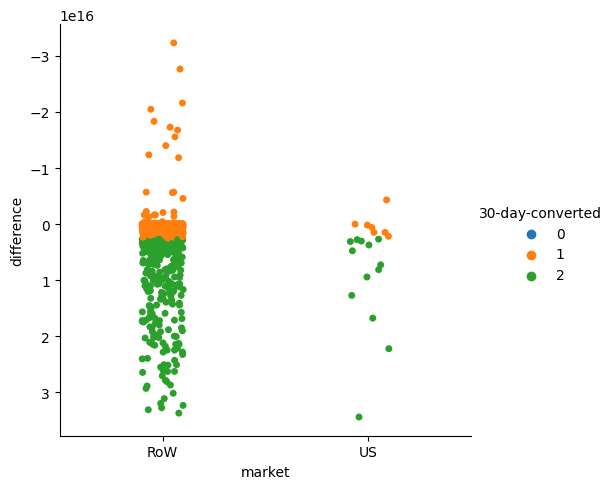

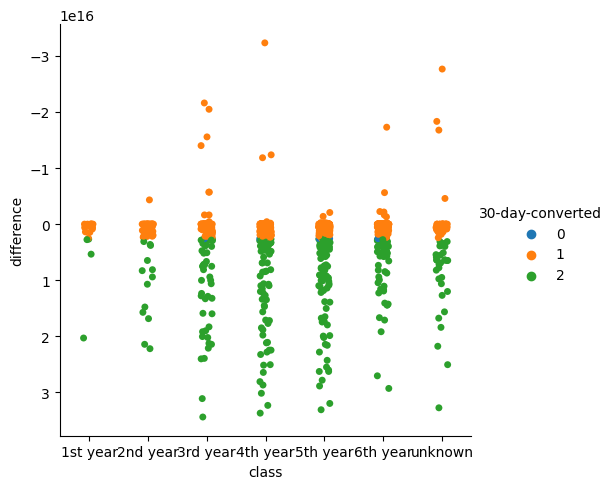

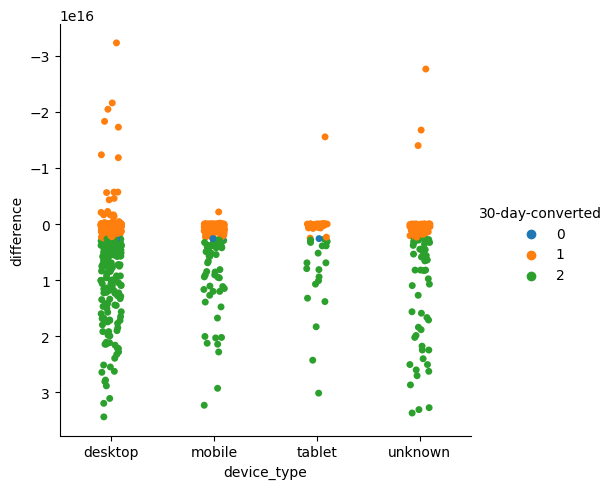

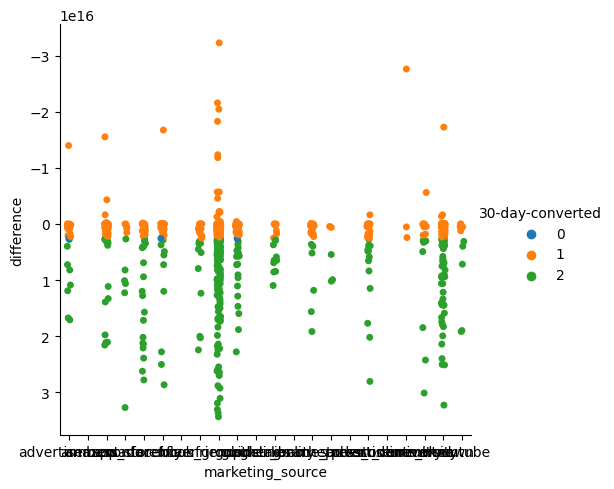

In [14]:
#get all categorical columns
cat_columns = df.select_dtypes(['category']).columns.to_list()
cat_columns.remove('30-day-converted')

# plot a catplot for each categorical column
for col in cat_columns:
    sns.catplot(x=col, y='difference', data=df, hue='30-day-converted')
    plt.show()

In [ ]:
# adding columns for year and month
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month

In [12]:
# save cleaned data to csv file
df.to_csv('data/amboss_cleaned.csv')